In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fatalities = pd.read_csv("fatalities.csv")

date_of_event
2000      35
2001     353
2002    1325
2003     733
2004     928
2005     234
2006     684
2007     395
2008     915
2009    1045
2010      89
2011     129
2012     261
2013      41
2014    2332
2015     177
2016     116
2017      76
2018     302
2019     145
2020      30
2021     325
2022     205
2023     249
Name: name, dtype: int64


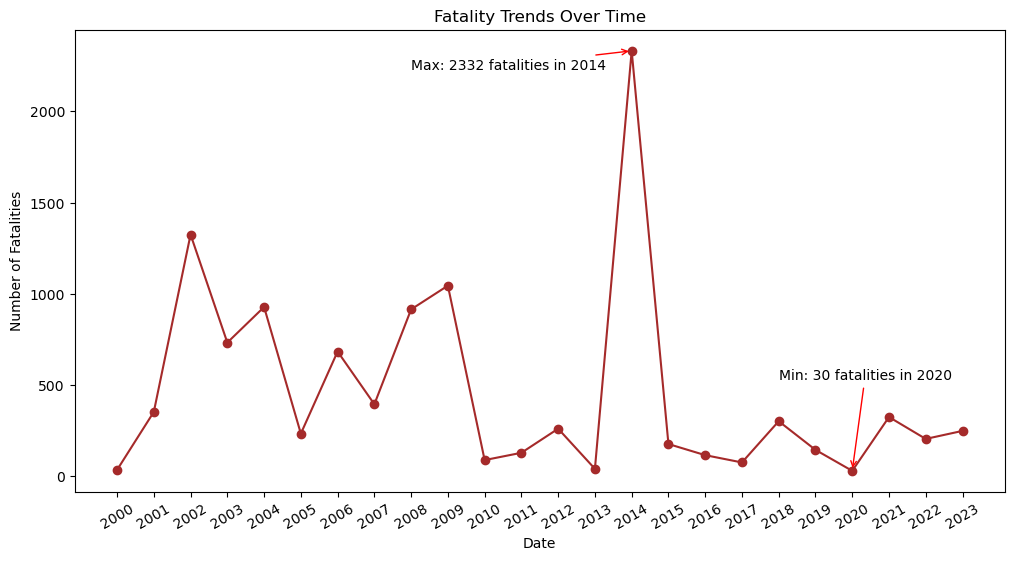

In [3]:
# Task 1

fatalities['date_of_event'] = pd.to_datetime(fatalities['date_of_event'])
plt.figure(figsize=(12, 6))
fatalitiesCount = fatalities.groupby(fatalities['date_of_event'].dt.year)["name"].count()
print(fatalitiesCount)
fatalitiesCount.plot(title='Fatality Trends Over Time', marker = "o", color="brown")

plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.xticks(range(min(fatalities['date_of_event'].dt.year), max(fatalities['date_of_event'].dt.year) + 1), rotation=30)

# Annotate the peak point
peak_year = fatalitiesCount.idxmax()
peak_count = fatalitiesCount.max()
plt.annotate(f'Max: {peak_count} fatalities in {peak_year}', xy=(peak_year, peak_count),
             xytext=(peak_year - 6, peak_count -100), arrowprops=dict(arrowstyle='->', color='red'))

# Annotate the min point
min_year = fatalitiesCount.idxmin()
min_count = fatalitiesCount.min()
plt.annotate(f'Min: {min_count} fatalities in {min_year}', xy=(min_year, min_count),
             xytext=(min_year - 2, min_count + 500), arrowprops=dict(arrowstyle='->', color='red'))

plt.show()


Age data
 age
112.0      1
92.0       1
91.0       1
101.0      1
83.0       1
        ... 
19.0     534
23.0     581
20.0     589
21.0     610
22.0     630
Name: name, Length: 95, dtype: int64
Gender data
 M    9681
F    1423
Name: gender, dtype: int64
Citizen data
 Palestinian    10092
Israeli         1029
Jordanian          2
American           1
Name: citizenship, dtype: int64


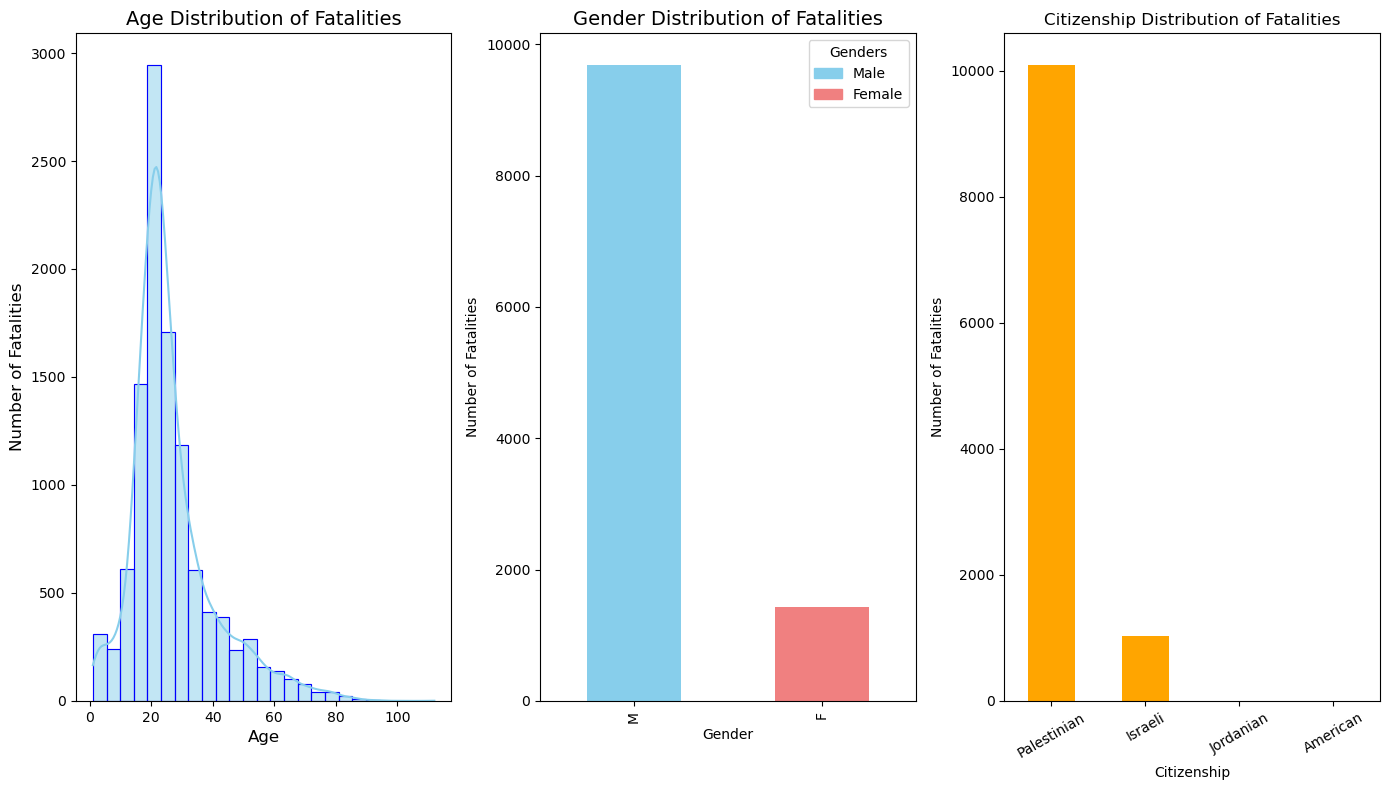

In [21]:
# Task 2

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 8))

ageData = fatalities['age'].dropna()
genderData = fatalities['gender'].value_counts()
citizenData = fatalities['citizenship'].value_counts()
print("Age data\n",fatalities.groupby('age')['name'].count().sort_values())
print("Gender data\n",genderData)
print("Citizen data\n",citizenData)


# Age Examination
sns.histplot(ageData, bins=25, kde=True, color='skyblue', edgecolor='blue', ax=ax1)
ax1.set_title('Age Distribution of Fatalities', fontsize=14)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Number of Fatalities', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)


# Gender Examination
colors=['skyblue', 'lightcoral']
genderData.plot(kind='bar', color=colors, ax=ax2)
ax2.set_title('Gender Distribution of Fatalities', fontsize=14)
ax2.set_xlabel('Gender', fontsize=10)
ax2.set_ylabel('Number of Fatalities', fontsize=10)
# Customized legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = ['Male', 'Female']
ax2.legend(handles, labels, title = 'Genders')

# Citizenship Examination
citizenData.plot(kind='bar', color='orange', ax=ax3)
ax3.set_title('Citizenship Distribution of Fatalities')
ax3.set_xlabel('Citizenship')
ax3.set_ylabel('Number of Fatalities')
ax3.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

Location wise fatality count
 Gaza City         2232
Rafah              832
Khan Yunis         538
Jabalya R.C.       477
Beit Lahiya        471
Jabalya            411
Beit Hanoun        409
Nablus             293
al-Bureij R.C.     240
Deir al-Balah      220
Name: event_location, dtype: int64


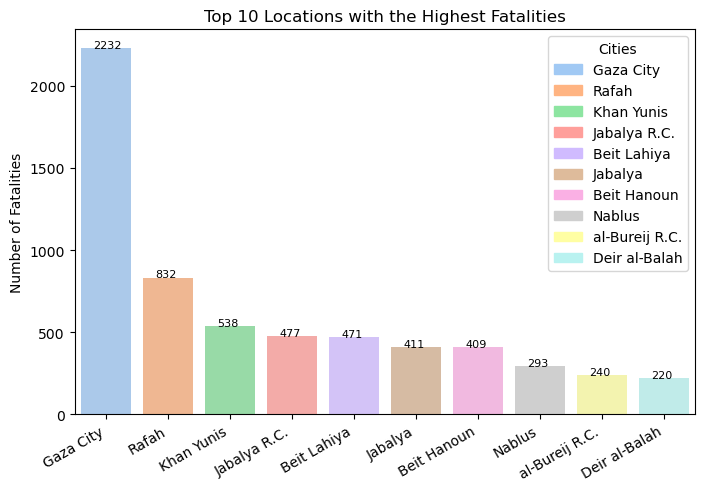

In [15]:
# Task 3

print("Location wise fatality count\n", fatalities['event_location'].value_counts().head(10))
# Select the top 10 locations with most fatalities count
topTenLocations = fatalities['event_location'].value_counts().head(10)

plt.figure(figsize=(8, 5))
# chart = topTenLocations.plot(kind='bar', color=colors)
sns.barplot(x=topTenLocations.index, y=topTenLocations.values, palette='pastel')


plt.title('Top 10 Locations with the Highest Fatalities', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=10)
plt.xticks(rotation=30, ha='right') 

# Add count annotations on top of each bar
for bar, count in zip(chart.patches, topTenLocations):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 1 , str(count), fontsize=8)

# Adding customized Legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette('pastel')]
labels = topTenLocations.index
plt.legend(handles, labels, title="Cities")

plt.show()

Injury counts
 gunfire                         9849
explosion                        555
shelling                         311
stabbing                          48
house demolition                  25
hit by a vehicle                  18
beating                            9
stones throwing                    6
being bludgeoned with an axe       4
fire                               4
physically assaulted               2
physical assault                   1
Strangulation                      1
Name: type_of_injury, dtype: int64


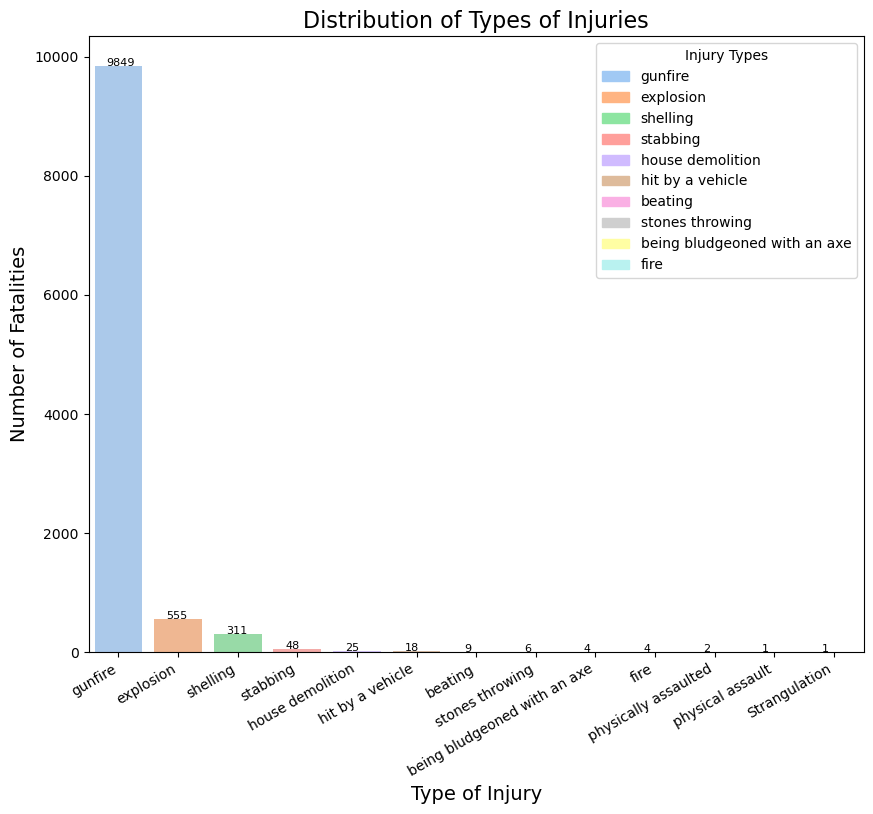

In [17]:
# Task 4

# Count the number of occurrences for each type of injury
injuryData = fatalities['type_of_injury'].value_counts()
print("Injury counts\n", injuryData)
# List for colors
colors = ['skyblue', 'lightcoral', 'gold', 'mediumseagreen', 'lightsalmon',
          'royalblue', 'thistle', 'lightsteelblue', 'indianred', 'palegreen']

# Create a bar plot for the types of injuries
plt.figure(figsize=(10, 8))
# chart = injuryData.plot(kind='bar', color=colors)
sns.barplot(x=injuryData.index, y=injuryData.values, palette='pastel')
plt.title('Distribution of Types of Injuries', fontsize=16)
plt.xlabel('Type of Injury', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)
plt.xticks(rotation=30, ha='right') 
# Add count annotations on top of each bar
for bar, count in zip(chart.patches, injuryData):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 1 , str(count), fontsize=8)

#  Adding customized legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette('pastel')]
labels = injuryData.index
plt.legend(handles, labels, title="Injury Types")

plt.show()

Ammunation Count
 missile                        2877
live ammunition                1514
shell                           675
explosive belt                  326
bomb                            249
mortar fire                      51
knife                            37
flechette shells                 22
rubber-coated metal bullets      19
0.22-caliber bullets             16
phosphorus shell                 16
Qassam rocket                    15
car bomb                         15
teargas canister                 13
rocket                           12
grad rocket                       7
sponge rounds                     2
grenade                           2
flare bomb                        1
stun grenade                      1
rock                              1
Name: ammunition, dtype: int64


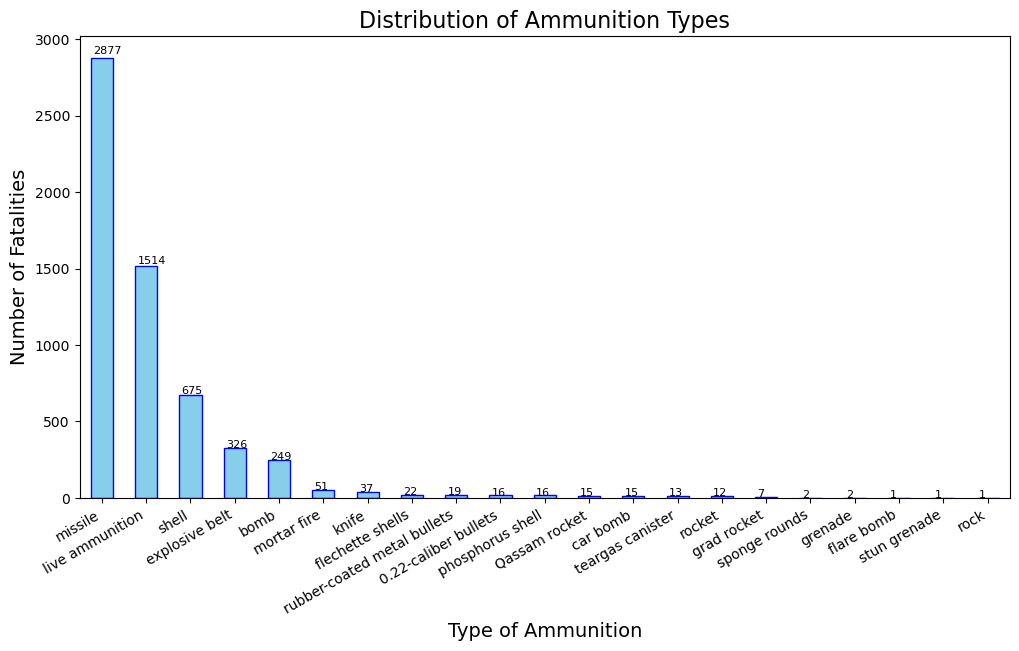

In [18]:
#  Task 5

# Count the number of occurrences for each type of ammunition
ammunitionData = fatalities['ammunition'].value_counts()
print("Ammunation Count\n",ammunitionData)
# Create a bar plot for the types of ammunition
plt.figure(figsize=(12, 6))
chart = ammunitionData.plot(kind='bar', color='skyblue', edgecolor='blue')

plt.title('Distribution of Ammunition Types', fontsize=16)
plt.xlabel('Type of Ammunition', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better visibility

# Add count annotations on top of each bar
for bar, count in zip(chart.patches, ammunitionData):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2,  1.01 * bar.get_height() + 1 , str(count), fontsize=8)


plt.show()

In [19]:
#  Task 6
victim_data = pd.DataFrame()

victim_data['Age Group'] = pd.cut(fatalities['age'], bins=[0, 20, 30, 40, 50, float('inf')],
                                  labels=['<20', '20-30', '30-40', '40-50', '50+'])
victim_data['Gender'] = fatalities['gender']
victim_data['Citizenship'] = fatalities['citizenship']
victim_data['Place of Residence'] = fatalities['place_of_residence']

print(victim_data)

      Age Group Gender  Citizenship Place of Residence
0         30-40      M  Palestinian     Nur Shams R.C.
1         20-30      M  Palestinian     Nur Shams R.C.
2           <20      M  Palestinian           al-Yamun
3           <20      M  Palestinian  'Aqbat Jaber R.C.
4           <20      M  Palestinian              Jenin
...         ...    ...          ...                ...
11119       50+      M      Israeli            Kedumim
11120     20-30      M  Palestinian         Beit Furik
11121     30-40      M      Israeli         Elon Moreh
11122     20-30      M  Palestinian              Bidya
11123     20-30      M      Israeli             Ashdod

[11124 rows x 4 columns]
